# 1. Background
* 디지털 방사선 촬영은 뼈 골절 진단을 위한 가장 일반적이고 비용 효율적인 표준 중 하나입니다. 이러한 진단에는 전문가의 개입이 필요하며, 이는 시간이 많이 걸리고 엄격한 훈련이 필요합니다.


* 알고리즘을 개발하려면 적절한 주석이 있는 대규모 데이터 세트가 필요합니다. 기존 X-선 데이터 세트는 작거나 적절한 주석이 부족하여 기계 학습 알고리즘의 개발과 분류, 국소화 및 세분화를 위한 알고리즘의 상대적 성능 평가가 방해를 받습니다. 방글라데시의 3개 주요 병원에서 수집한 이미지에서 큐레이션한 새로운 X-선 스캔 데이터 세트인 FracAtlas를 제시합니다.

* 최근 의학의 다양한 분야에서 대규모 데이터 세트와 고급 머신 러닝 알고리즘을 활용하여 진단 자동화 프로세스가 빠르게 개발되고 있습니다. 이러한 모델을 학습하려면 대규모의 잘 주석 처리된 데이터 세트가 필요합니다 

# 2. Data compare and Introduce
* 데이터 다운로드 : https://figshare.com/articles/dataset/The_dataset/22363012?file=43283628
* 공개적으로 사용 가능하고 이상에 초점을 맞춘 잘 알려진 X-선 데이터 세트로는 MURA 10 , MedPix 11 , GRAZPEDWRI-DX 12 , IIEST 1 , MOST 13 , VinDr-CXR 2 , VinDr-SpineXR 14 및 ChestX-ray14 15 가 있습니다.


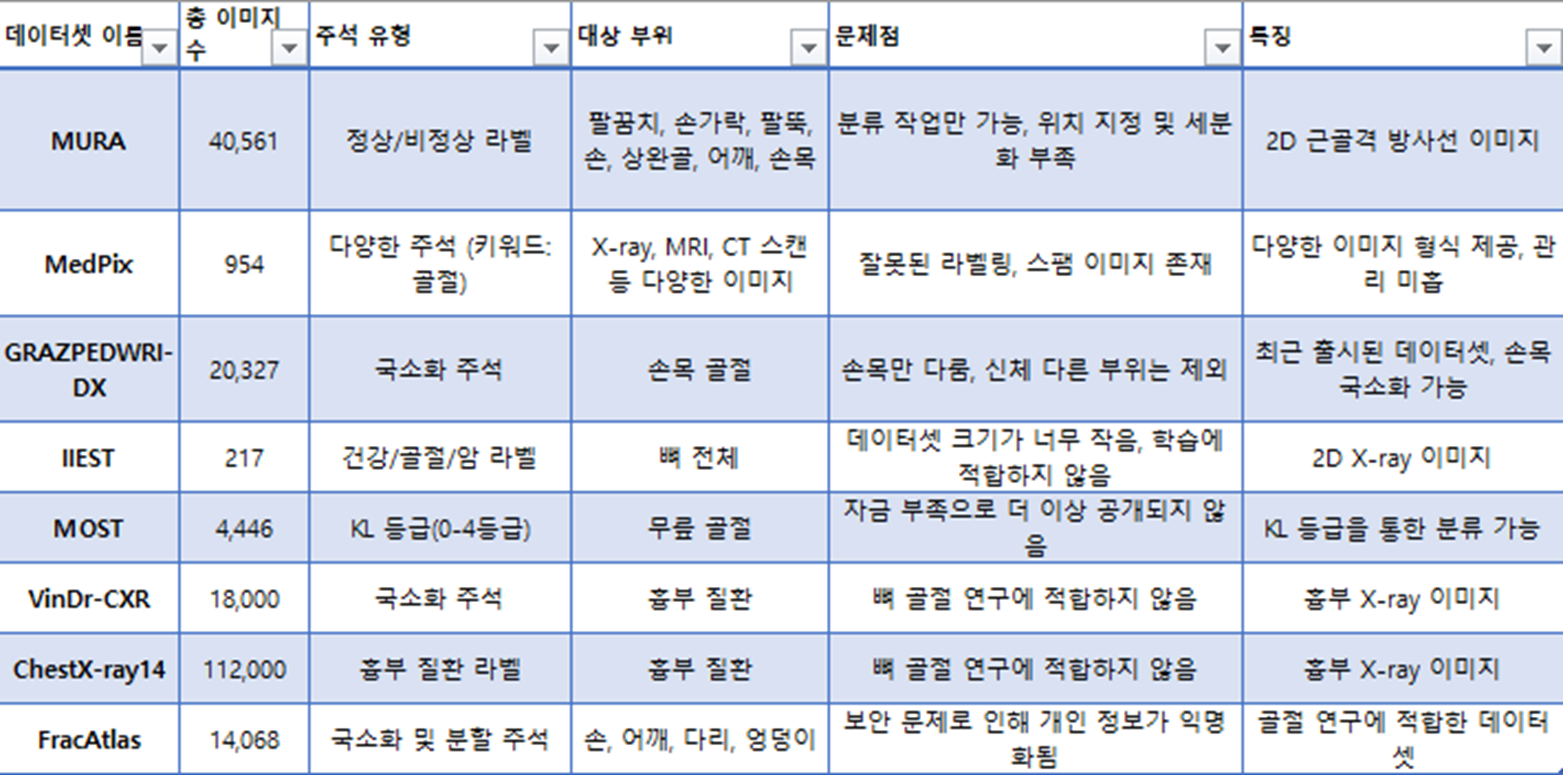


### 2.1 <span style="color: #2D3748; background-color:#fff5b1;">**FracAtlas**</span>
* 4,083개의 CT 이미지
* 손, 어깨, 다리, 엉덩이
* 정상, 비정상 분류 / <span style="color: #2D3748; background-color:#fff5b1;"> 골절 부분 라벨링 되어있다.</span> -> <U>Classification, <span style="color: #2D3748; background-color:#fff5b1;">Segmentation 용이</span></U>
   
### 2-2. FracAtlas의 대상자 정보
* FlacAtlas 데이터의 연령 분포는 8개월 ~ 78세 입니다.
* 골절 데이터의 성별 분포는 남성 : 85.4%, 여성 : 14.6% 입니다.
* 전체(정상 + 골절) 데이터의 성별 분포는 남성 : 62%, 여성 : 38% 입니다.


### 2.3 각 부위 별 정상, 골절 데이터 수와 고정 장치, Multi view 수
* 정형외과의 고정 장치(아드웨어)가 있는 99개의 이미지가 있습니다.
* 전체 손 데이터 수는 1,538개이며 그 중 골절은 437개 입니다.
* 전체 다리 데이터 수는 2,272개이며 그 중 골절은 263개 입니다.
* 전체 엉덩이 데이터 수는 338개이며 그 중 골절은 63개 입니다.
* 전체 어깨 데이터 수는 349개이며 그 중 골절은 63개 입니다.
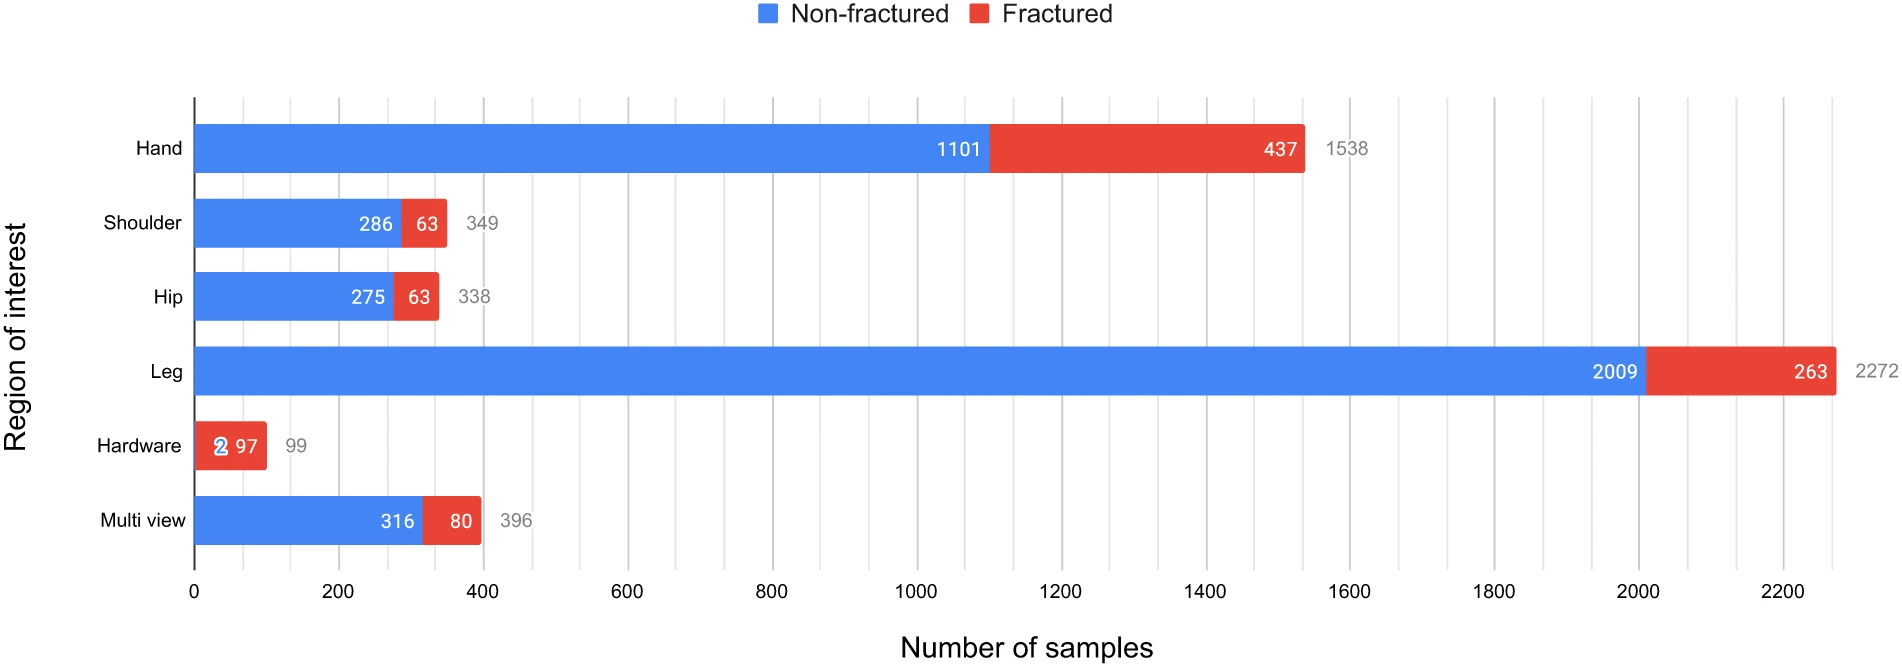


### 2.4 정상, 골절 데이터의 정면, 측면, 사선 촬영 수
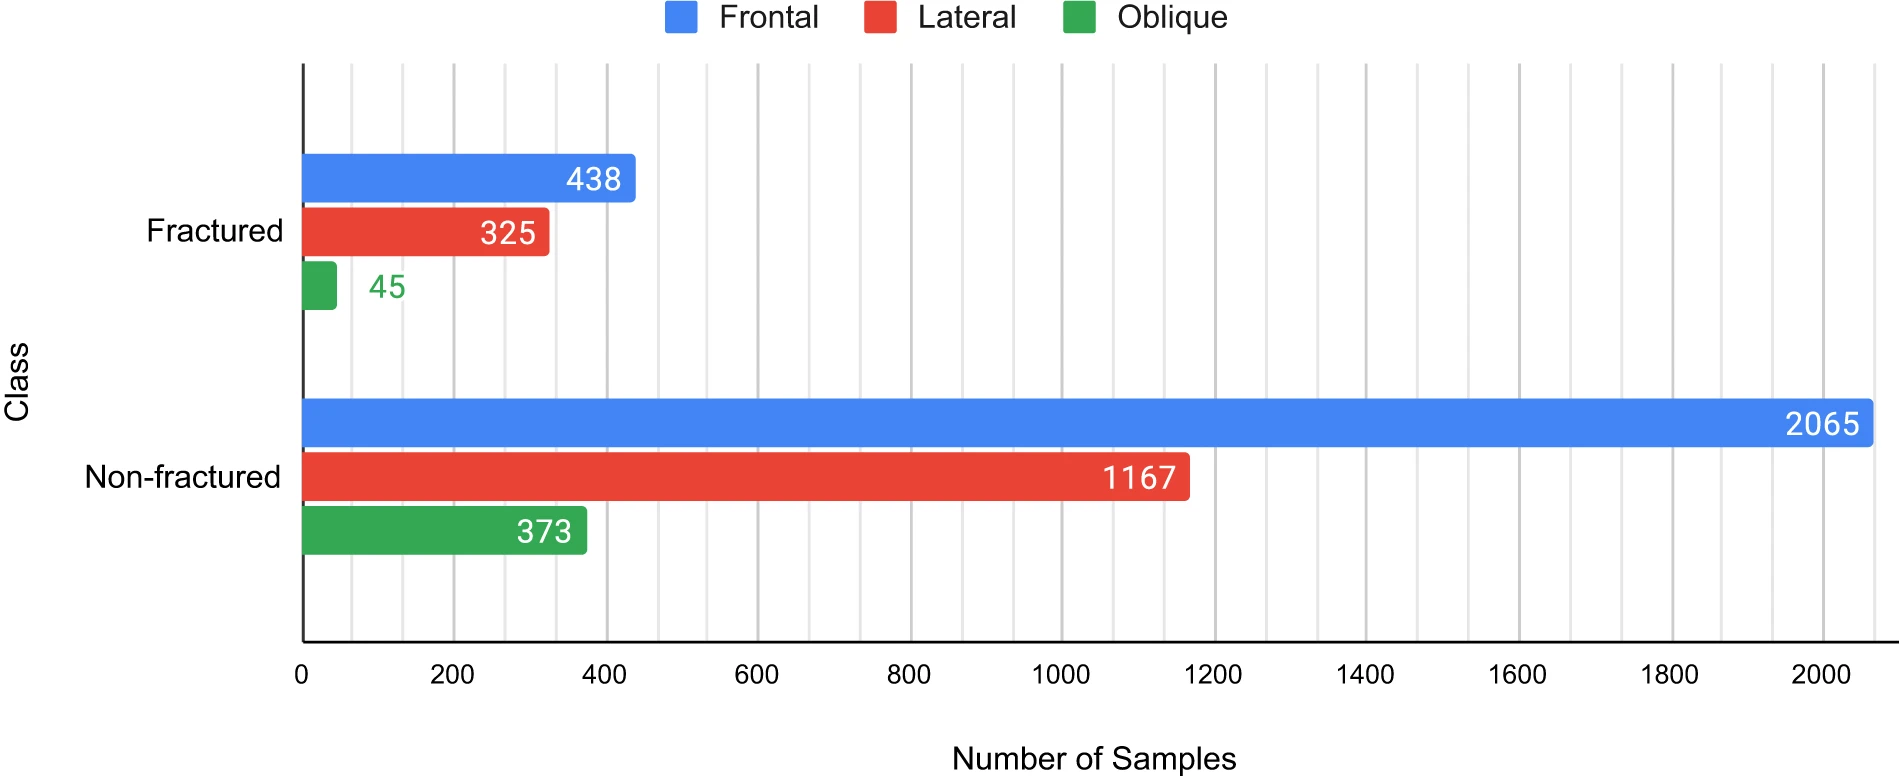

# 3. Data pre-processing
* 데이터 제거 기준
    1. 팔, 어깨, 다리, 엉덩이 제외한 나머지 부위
    2. 스캔의 선명도 및 해상도를 기준으로 수동 필터링
    
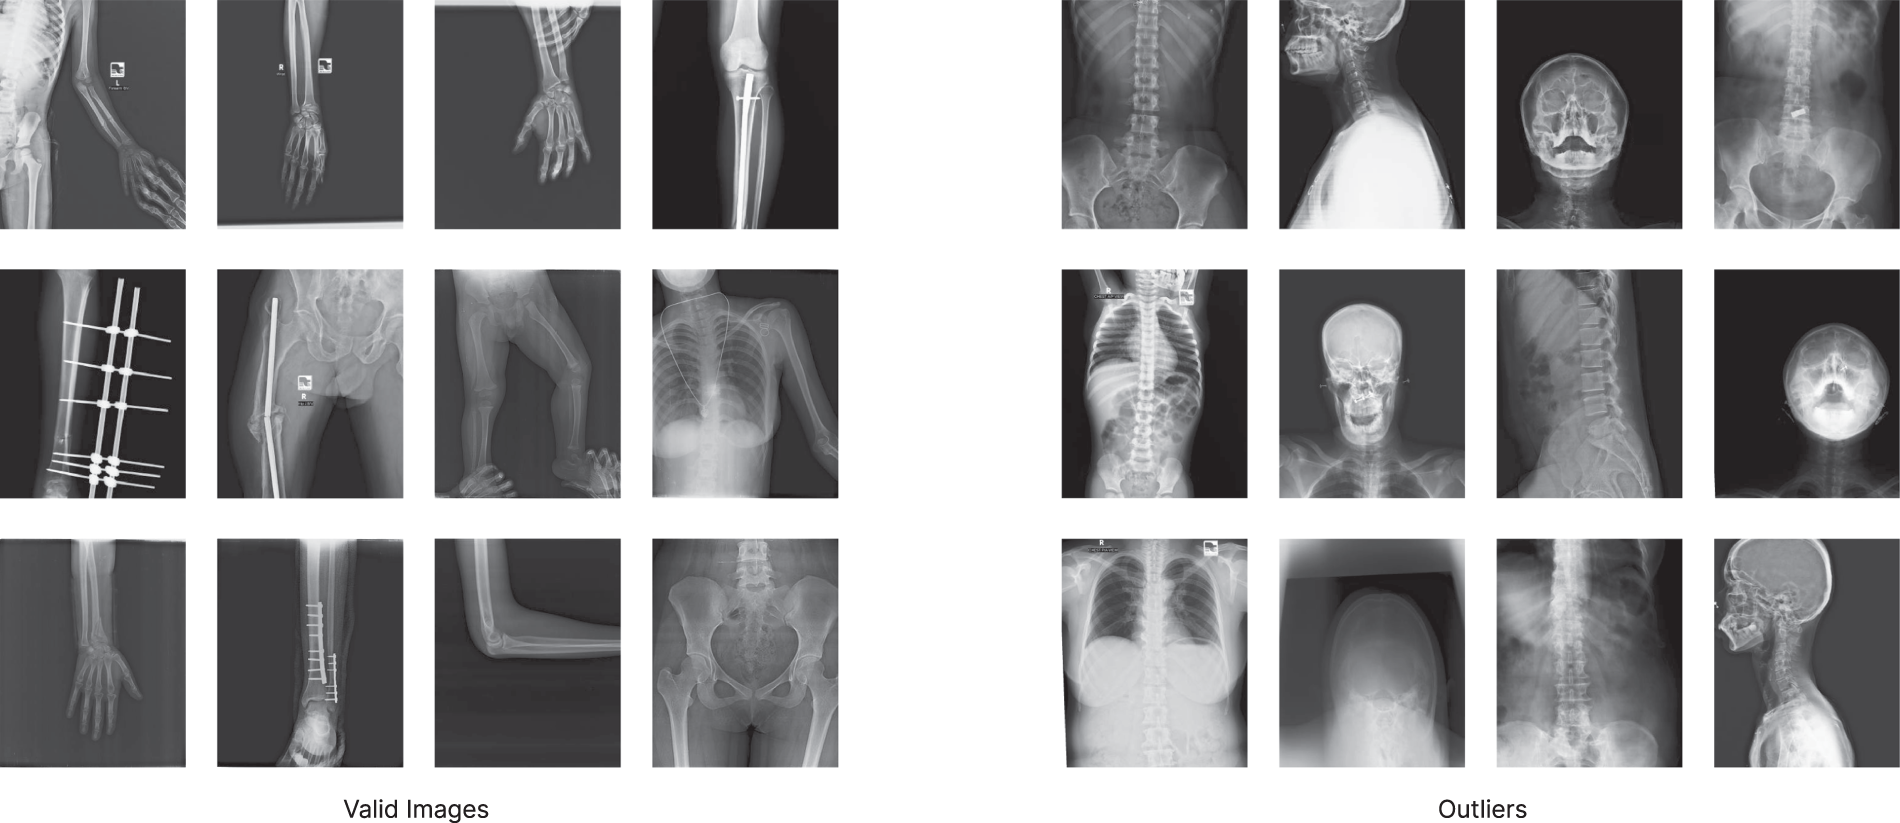

# 4. FracAtlas Folder Info
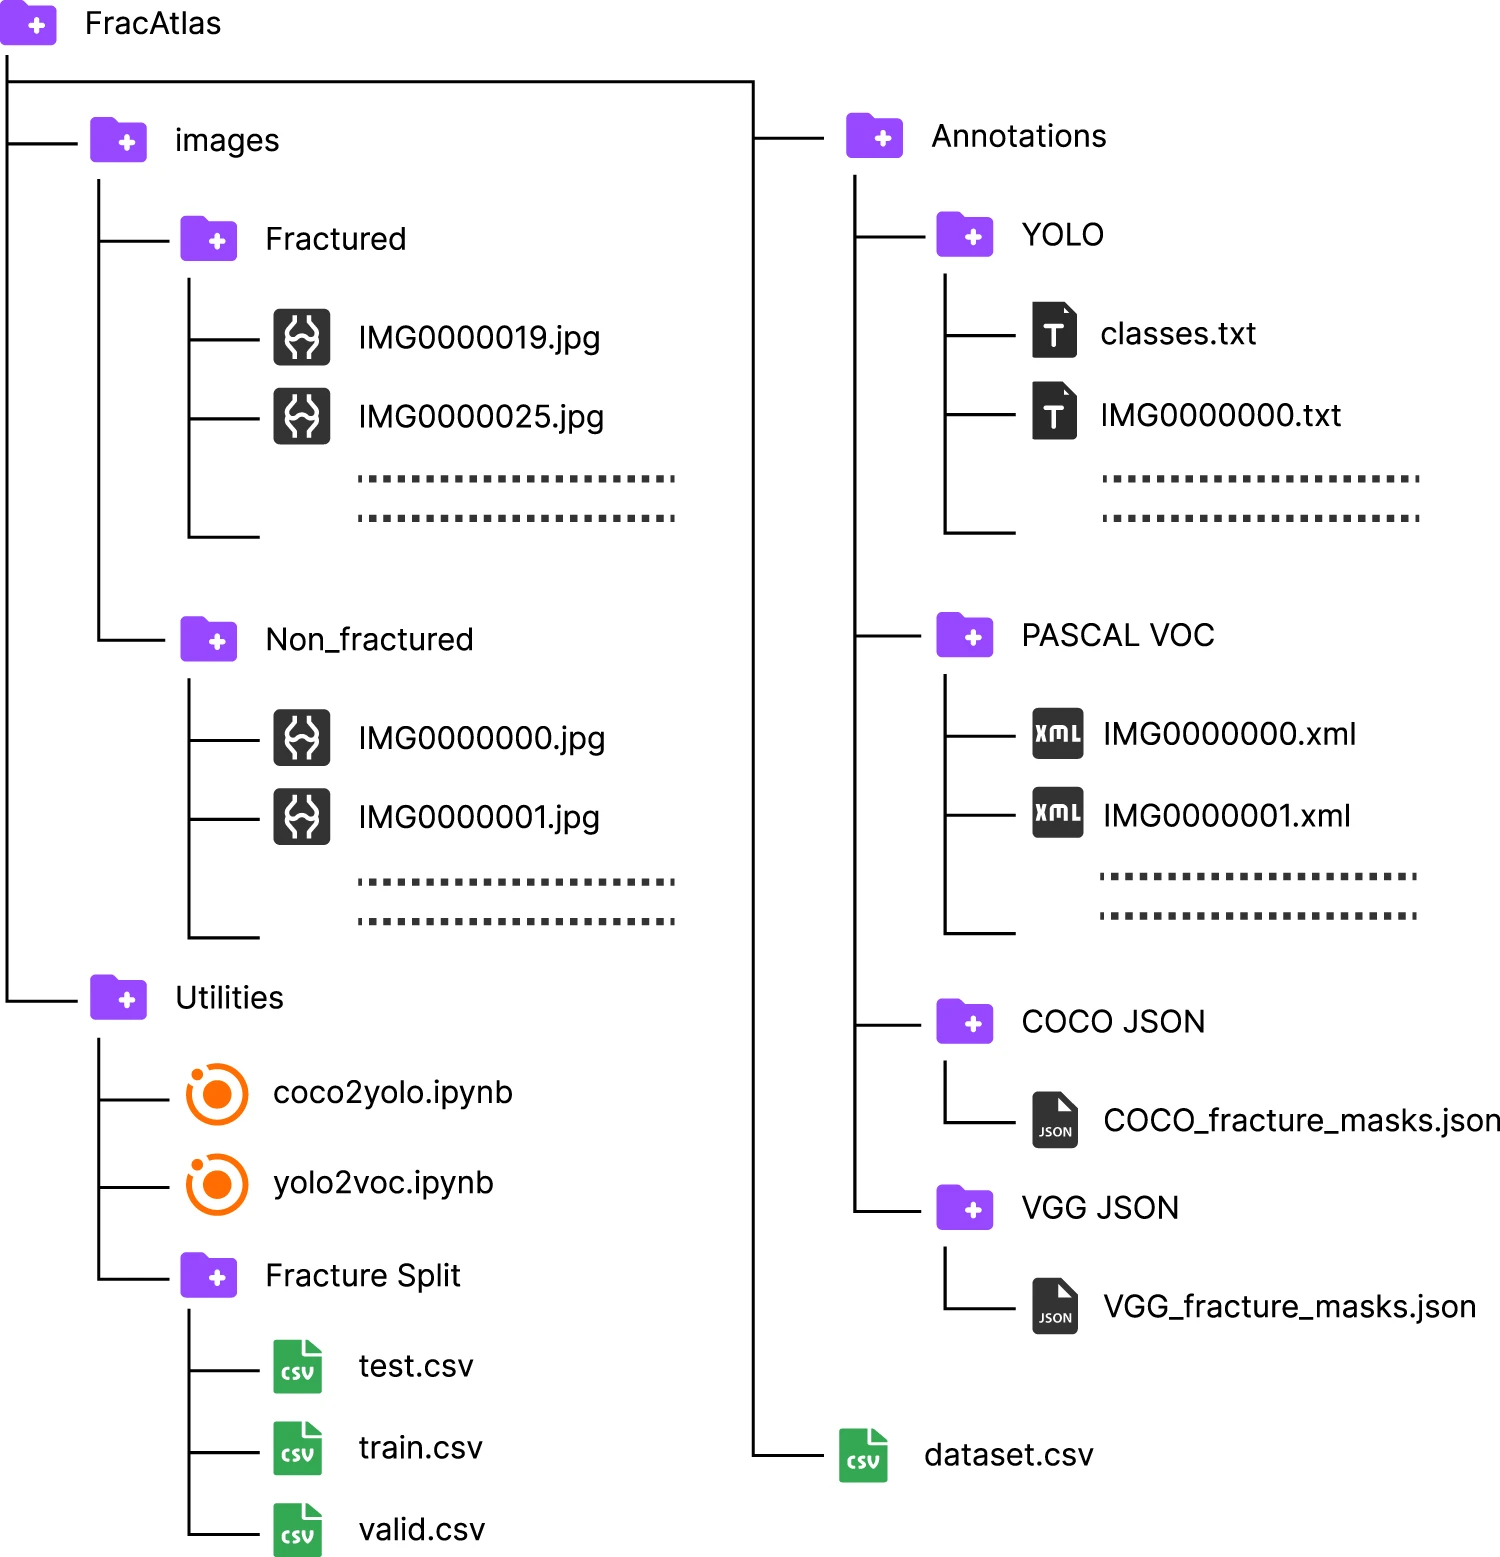

### 4.1 Label Data
* dataset.csv 파일 안에 fractured라는 컬럼이 골절 여부를 나타내므로 Classification에서 정답 데이터로 활용
* 골절 여부 말고 골절 위치, 고정 장치 여부 등 각 이미지 데이터를 설명하는 데이터가 있습니다.

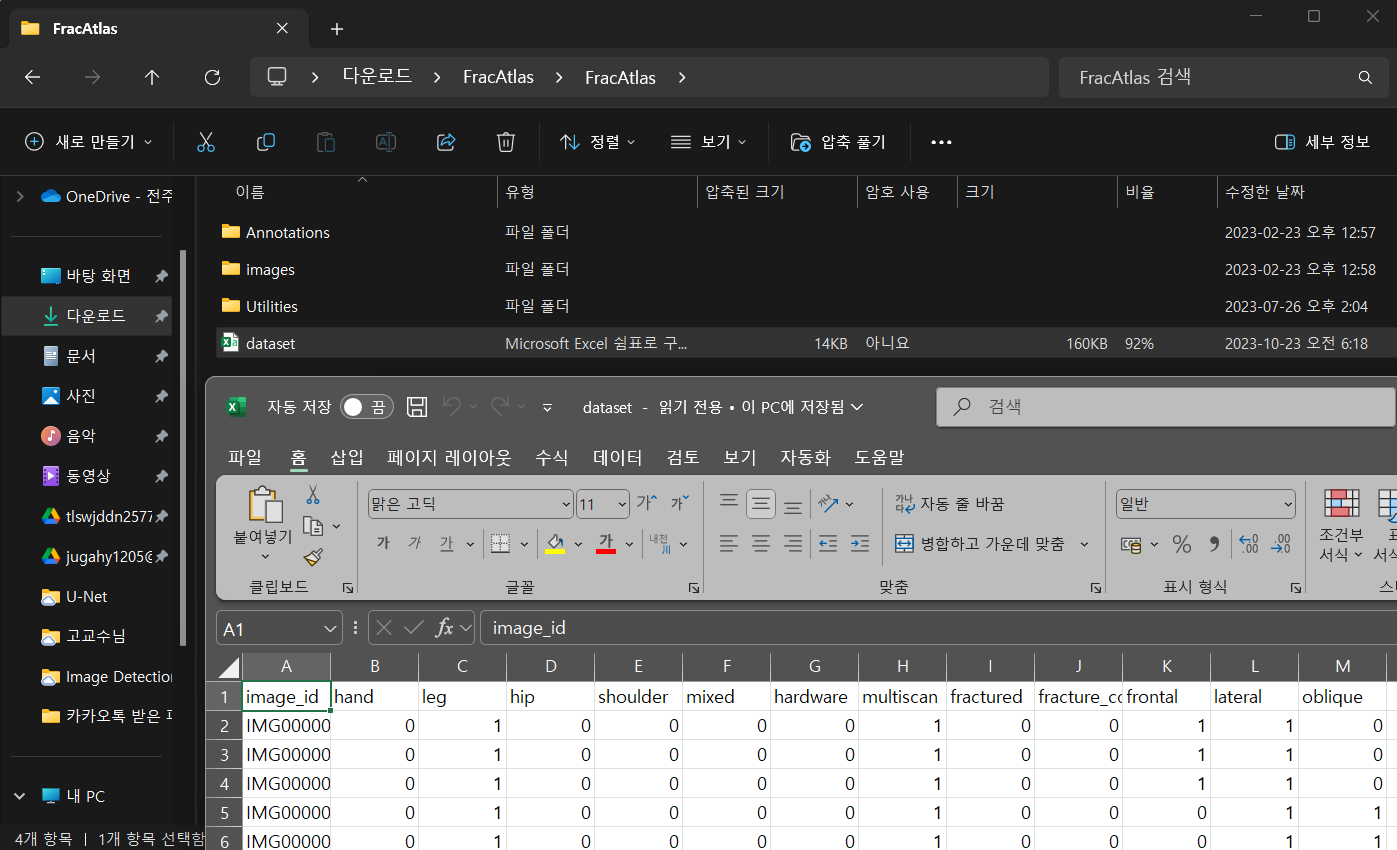

### 4.2 Localization을 위한 데이터
* FracAtlas - Annotations - YOLO - txt 파일
* 정상 데이터의 경우 비어있는 txt 파일이 주어지고 골절 데이터의 경우 골절 부분을 Bounding Box로 표기하기 위한 좌표값이 들어있습니다.

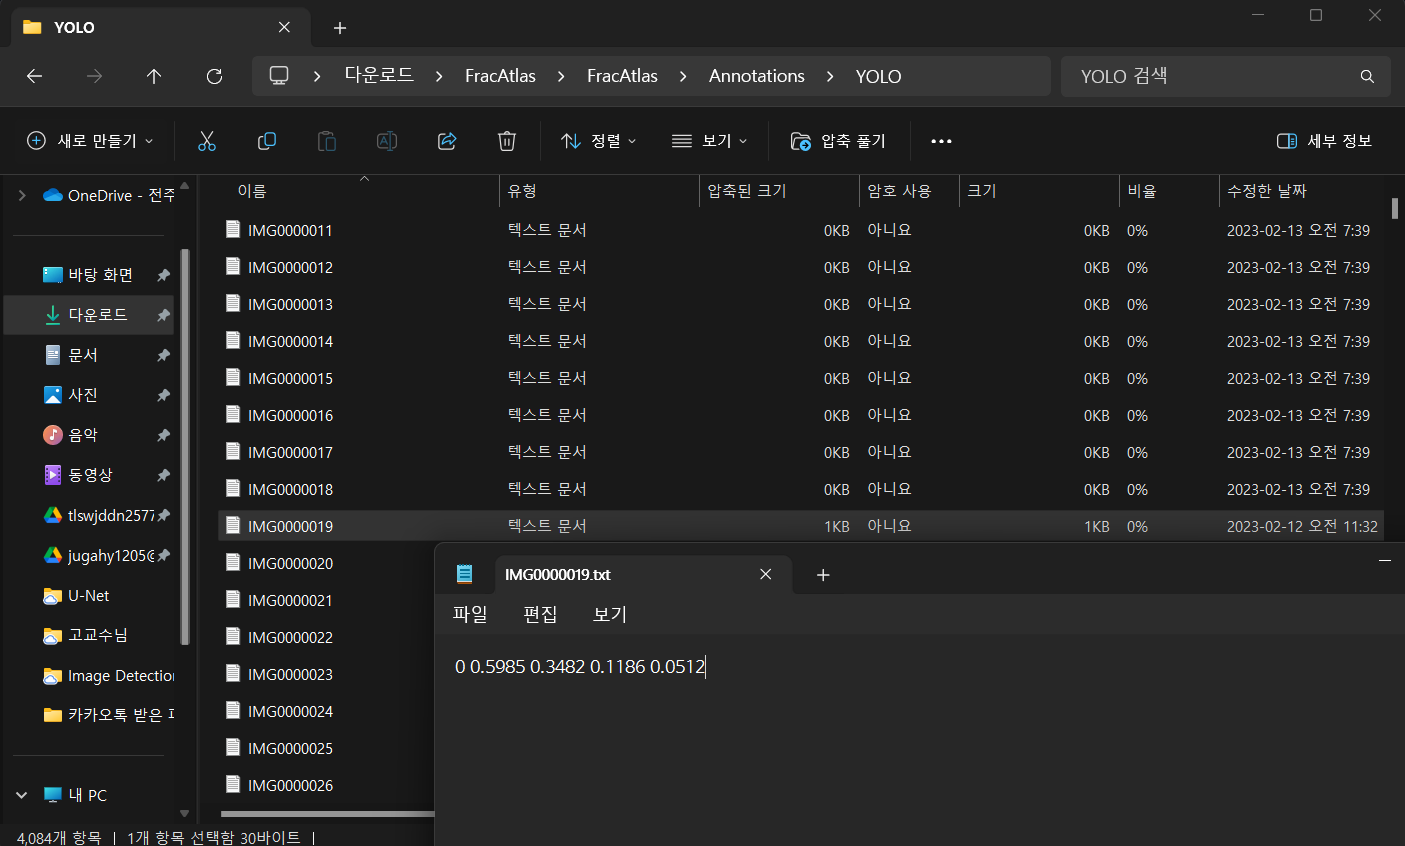

### 4.3 Segmentation을 위한 데이터
* FracAtlas - Annotations - VGG JSON - VGG_fracture_masks.json
* json 형식으로 각 골절 데이터에 대한 좌표값들이 polygon 형태로 들어있습니다.


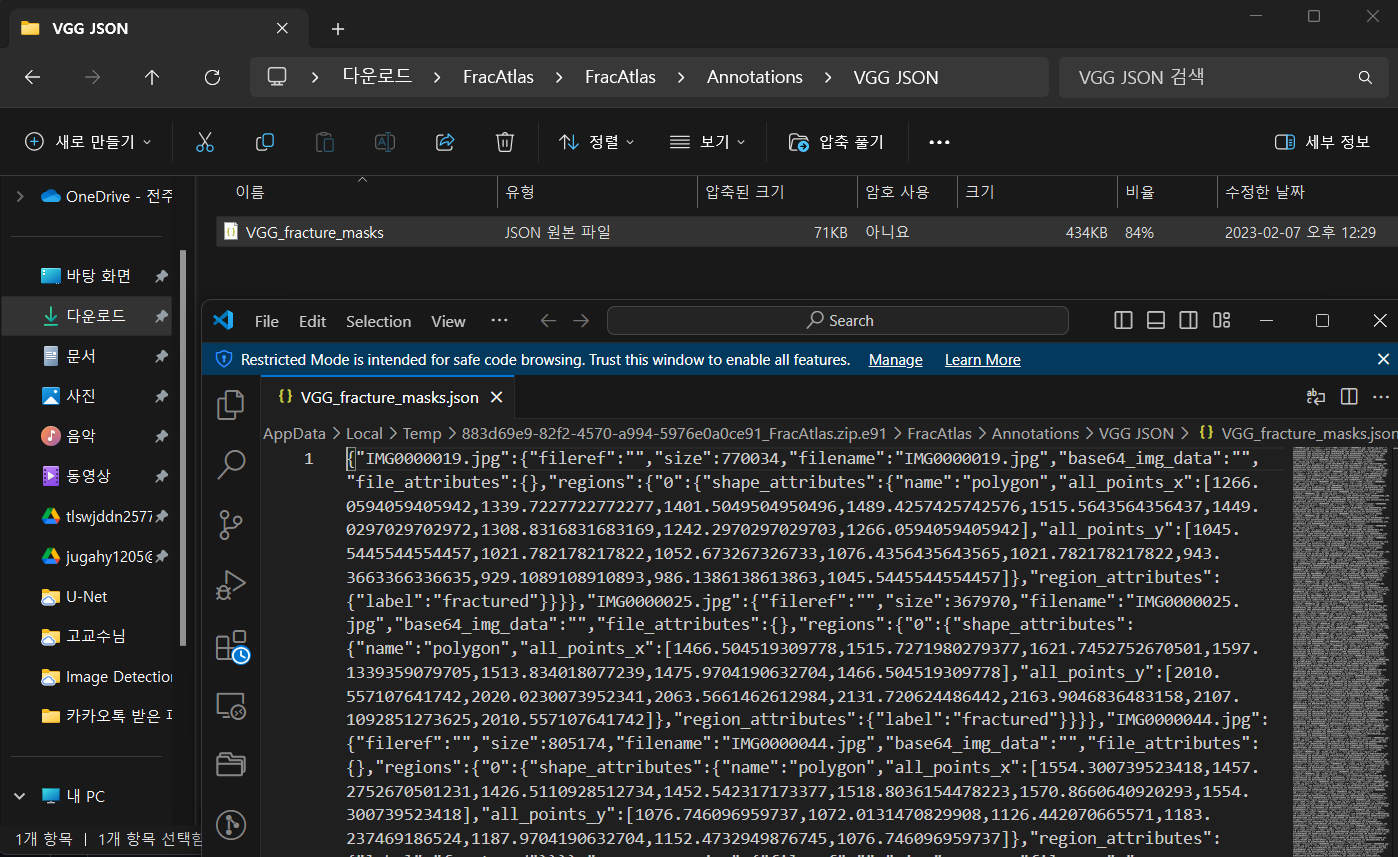

# 5. 기술적 검증
* 데이터 세트가 머신러닝 알고리즘을 훈련하는 데 적합한지 확인하기 위해 YOLOv8과 YOLOv8-seg를 각각 사용하여 골절 Localization과 Segmentation 진행
* 어떤 과정으로 모델을 돌렸는지 얘기 없고 결과만 있습니다.


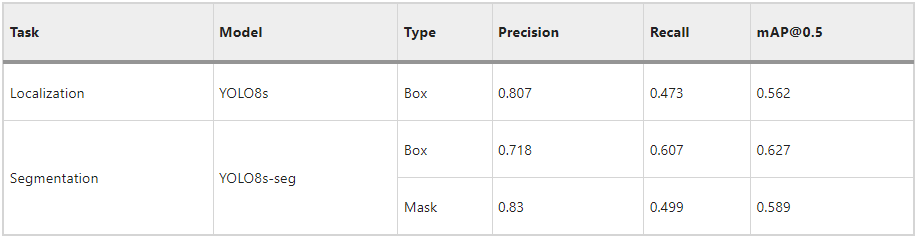

# 6. 주의할 점
* 환자의 연령이 골절 분석 측면에서 큰 영향을 미친다는 것을 관찰했습니다.
* 어린 대상자(0~7세)의 경우 관절 근처 뼈 끝은 뼈 밀도가 부족하여 잘 못 분리된 데이터처럼 보일 수 있습니다.
* 반대로 노령 환자(50세 이상)의 경우 뼈 표면이 거칠어 보일 수 있습니다. 이로인해 모델이 해당 뼈를 골절로 잘 못 판단할 수 있습니다.
* 따라서 골절 연구를 위한 데이터 세트에는 다양한 환자 연령대가 포함되어야 합니다.